# Camera Calibration Pipeline


In [1]:
# imports
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
import json

## extract frames from video

In [2]:



def extract_frames(video_path, output_dir):
    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            cv2.imwrite(os.path.join(output_dir, 'frame_{:d}.jpg'.format(count)), frame)
            count += 1
        else:
            break
    cap.release()
    print('{} images are extacted in {}.'.format(count, output_dir))
    return count

def extract_frames_from_video(video_path, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    extract_frames(video_path, output_dir)

# extract_frames_from_video("../cam1_chess_floor.avi", 'camera1')
# extract_frames_from_video("../cam2_chess_floor.avi", 'camera2') 

297 images are extacted in camera1.
240 images are extacted in camera2.


## load in frames

In [3]:
def load_image(img_path):
    return cv2.imread(img_path)

camera_calibration_data = {}

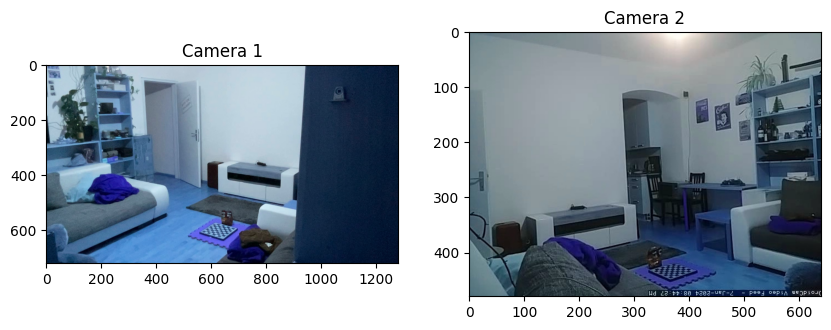

In [12]:
cam1_image = load_image('./cam1_chess_floor.jpg')
cam2_image = load_image('./cam2_chess_floor.jpg')

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cam1_image)
plt.title('Camera 1')

plt.subplot(1, 2, 2)
plt.imshow(cam2_image)
plt.title('Camera 2')
plt.show()

In [11]:
# # flipping images (optional)
# print(type(cam2_image))
# cam2_image_flipped = np.flipud(cam2_image)
# cam2_image_flipped = np.fliplr(cam2_image_flipped)
# # save flipped image
# cv2.imwrite('cam2_chess_floor.jpg', cam2_image_flipped)


## detect chess board

True
Camera matrix:
[[5.72432532e+03 0.00000000e+00 5.25844873e+02]
 [0.00000000e+00 5.57996833e+03 6.97995810e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
[[ 2.95908897e+00 -1.28632219e+02  4.55866885e-04  6.17156330e-02
  -5.36117618e+03]]


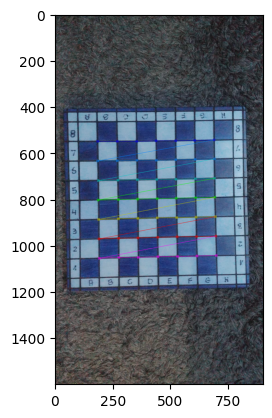

In [85]:
cam1_board_image = load_image('../chessboard_camera1.jpeg')

def process_chessboard_image_cam1(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    board = gray[452:1147, 90:790]

    # treshold the gray image to get the chessboard corners
    treshold = 150
    gray[gray < treshold] = 0
    gray[gray >= treshold] = 255

    # set every pixel outside the chessboard to white
    # so that the perspective transform can be applied
    gray[:480, :] = 255
    gray[1115:, :] = 255
    gray[:, :120] = 255
    gray[:, 750:] = 255

    ret, corners = cv2.findChessboardCorners(gray, (7, 7), None)
    print(ret)
    if ret:
        cv2.drawChessboardCorners(img, (7, 7), corners, ret)
        plt.imshow(img)
        pass
    
    # Prepare object points 0,0,0 ... 6,6,0
    objp = np.zeros((7*7, 3), np.float32)
    objp[:,:2] = np.mgrid[0:7, 0:7].T.reshape(-1, 2)

    # Arrays to store object points and image points from all images
    objpoints = []  # 3D points in real-world space
    imgpoints = []  # 2D points in image plane

    # Add the object points and image points for calibration
    objpoints.append(objp)
    imgpoints.append(corners)

    # Camera calibration
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    # Output the calibration parameters
    print(f"Camera matrix:\n{mtx}")
    print(f"Distortion coefficients:\n{dist}")
    # Store the calibration data for later use
    calibration_data = {
        'camera_matrix': mtx,
        'distortion_coefficients': dist,
        'rotation_vectors': rvecs,
        'translation_vectors': tvecs
    }

    return calibration_data

camera_calibration_data["camera1"] = process_chessboard_image_cam1(cam1_board_image)


True
Camera matrix:
[[3.26502591e+03 0.00000000e+00 1.14423353e+03]
 [0.00000000e+00 3.30793674e+03 2.61250764e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
[[ 7.88207645e-01 -1.17103670e+01 -5.01280887e-03  2.87900078e-02
   6.57724664e+01]]


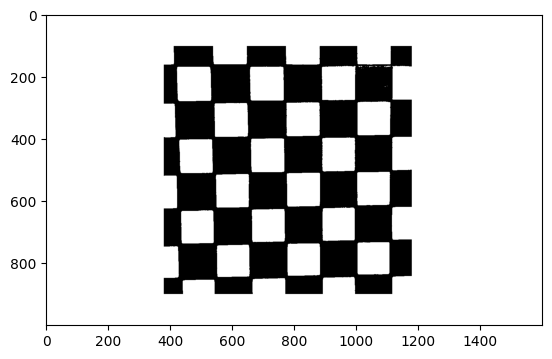

In [177]:
cam2_board_image = load_image('../chessboard_camera2.jpeg')

def process_chessboard_image_cam2(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    board = gray[100:900, 380:1180]

    # treshold the gray image to get the chessboard corners
    treshold = 110
    gray[gray < treshold] = 0
    gray[gray >= treshold] = 255

    # set every pixel outside the chessboard to white
    # so that the perspective transform can be applied
    gray[:100, :] = 255
    gray[900:, :] = 255
    gray[:, :380] = 255
    gray[:, 1180:] = 255

    plt.imshow(gray, cmap='gray')
    # plt.imshow(board)


    ret, corners = cv2.findChessboardCorners(gray, (7, 7), None)
    print(ret)
    if ret:
        cv2.drawChessboardCorners(img, (7, 7), corners, ret)
        # plt.imshow(img)
        pass
    
    # Prepare object points 0,0,0 ... 6,6,0
    objp = np.zeros((7*7, 3), np.float32)
    objp[:,:2] = np.mgrid[0:7, 0:7].T.reshape(-1, 2)

    # Arrays to store object points and image points from all images
    objpoints = []  # 3D points in real-world space
    imgpoints = []  # 2D points in image plane

    # Add the object points and image points for calibration
    objpoints.append(objp)
    imgpoints.append(corners)

    # Camera calibration
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    # Output the calibration parameters
    print(f"Camera matrix:\n{mtx}")
    print(f"Distortion coefficients:\n{dist}")
    # Store the calibration data for later use
    calibration_data = {
        'camera_matrix': mtx,
        'distortion_coefficients': dist,
        'rotation_vectors': rvecs,
        'translation_vectors': tvecs
    }

    return calibration_data
camera_calibration_data["camera2"] = process_chessboard_image_cam2(cam2_board_image)


In [195]:
camera_calibration_data
# save the calibration data as pickle file
with open('camera_calibration_data.pkl', 'wb') as f:
    pickle.dump(camera_calibration_data, f)

## Camera Calibration
Use the detected corners to calibrate the individual cameras.


In [13]:
# Example function to undistort an image using calibration data
def undistort_image(image, camera_matrix, distortion_coefficients):
    h, w = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion_coefficients, (w, h), 1, (w, h))
    undistorted_image = cv2.undistort(image, camera_matrix, distortion_coefficients, None, new_camera_matrix)
    # Crop the image based on the ROI to remove black borders due to undistortion
    x, y, w, h = roi
    undistorted_image = undistorted_image[y:y+h, x:x+w]
    return undistorted_image

cam1_image_undis = undistort_image(cam1_image, camera_calibration_data["camera1"]["camera_matrix"], camera_calibration_data["camera1"]["distortion_coefficients"])
cam2_image_undis = undistort_image(cam2_image, camera_calibration_data["camera2"]["camera_matrix"], camera_calibration_data["camera2"]["distortion_coefficients"])

# Display the images
plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(cam1_image)
plt.title('Camera 1')

plt.subplot(2, 2, 3)
plt.imshow(cam1_image_undis)
plt.title('Camera 1 undistorted')

plt.subplot(2, 2, 2)
plt.imshow(cam2_image)
plt.title('Camera 2')
plt.show()

plt.subplot(2, 2, 4)
plt.imshow(cam2_image_undis)
plt.title('Camera 2 undistorted')
plt.show()



KeyError: 'camera1'

## Chess Board Detection

In [145]:
import cv2
import numpy as np

# Initialize a list to store the clicked points
clicked_points = []

def click_event(event, x, y, flags, params):
    # Check for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        # Save the coordinates of the click
        clicked_points.append((x, y))
        # Display the clicked point on the image
        cv2.circle(params['image'], (x, y), 5, (0, 255, 0), -1)
        cv2.imshow('Image', params['image'])


image_copy = cam1_image_undis.copy()

# Create a window and set a mouse callback function for clicking
cv2.imshow('Image', cam1_image_undis)
cv2.setMouseCallback('Image', click_event, {'image': image_copy})

# Wait until 'q' is pressed to quit
print("Click on each corner of the chessboard. Press 'q' when done.")
while True:
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

# Now, clicked_points contains the coordinates of the clicked points
print("Clicked points:", clicked_points)


Click on each corner of the chessboard. Press 'q' when done.
Clicked points: [(665, 314), (584, 277), (588, 231), (660, 263)]


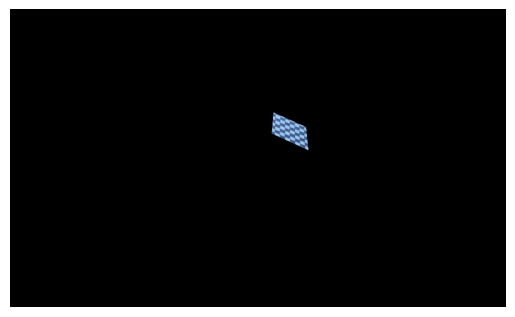

In [157]:
import cv2
import numpy as np

image = cam1_image_undis.copy()

# Create a mask for the selected points and apply it to the image
def mask_image(image, points):
    # Create a black image with the same dimensions as the original
    mask = np.zeros_like(image)
    
    # Create an array with the points in the correct order
    # Assuming the points are given in order: top-left, top-right, bottom-right, bottom-left
    pts = np.array([points[0], points[1], points[2], points[3]], dtype=np.int32)
    
    # Reshape the points in form required by polylines
    pts = pts.reshape((-1, 1, 2))
    
    # Draw the polygon on the mask and fill it white
    cv2.fillPoly(mask, [pts], (255, 255, 255))
    
    # Apply the mask and return the image
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

# Create the masked image
masked_image = mask_image(image, clicked_points)

# Show the masked image
plt.imshow(masked_image)
plt.axis('off')  # Hide the axes for better visualization
plt.show()



[[584 227]
 [661 262]
 [664 314]
 [589 279]]
[[665 314]
 [584 277]
 [588 231]
 [660 263]]
584 231 82 84


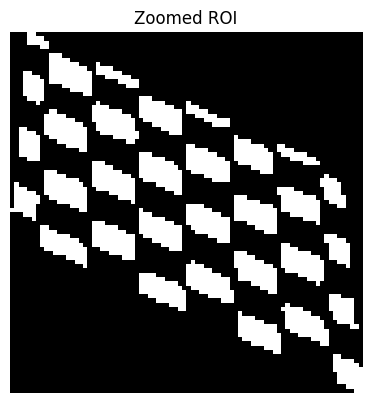

In [169]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Define the points for the region of interest
# The points are in the order: top-left, top-right, bottom-right, bottom-left
roi_points = np.array([(584, 227), (661, 262), (664, 314), (589, 279)], dtype=np.int32)
print(roi_points)
roi_points = np.array(clicked_points)
print(roi_points)
# Compute the bounding box of the region of interest
x, y, w, h = cv2.boundingRect(roi_points)
print(x, y, w, h)
# Crop the region of interest from the image
roi = masked_image[y:y+h, x:x+w]
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
roi_treshold = 170
roi_gray[roi_gray < roi_treshold] = 0
roi_gray[roi_gray >= roi_treshold] = 255


# Show the original masked image and the zoomed ROI
plt.figure(figsize=(10, 5))

# Zoomed region of interest
plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.imshow(roi_gray, cmap='gray')
plt.title('Zoomed ROI')
plt.axis('off')

plt.show()


Chessboard corners not found in the zoomed ROI.


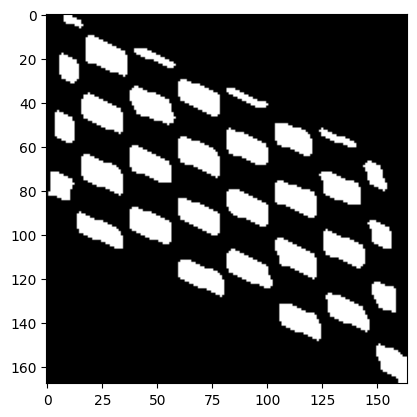

In [193]:
import cv2
import numpy as np

# Function to detect and refine chessboard corners
def find_and_refine_chessboard_corners(image, board_size):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    roi_treshold = 170
    gray[gray < roi_treshold] = 0
    gray[gray >= roi_treshold] = 255

    # Upsample image to make it larger
    upsampled_image = cv2.pyrUp(gray)
    # upsampled_image = cv2.pyrUp(upsampled_image)

    # Apply a Gaussian blur to smooth out noise
    blurred_image = cv2.GaussianBlur(upsampled_image, (5, 5), 0)

    gray = blurred_image
    roi_treshold = 170
    gray[gray < roi_treshold] = 0
    gray[gray >= roi_treshold] = 255

    plt.imshow(gray, cmap='gray')

    # Find chessboard corners
    found, corners = cv2.findChessboardCorners(gray, board_size, None)
    
    if found:
        # Refine corner locations to sub-pixel accuracy
        term_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), term_criteria)
        
        # Draw the detected corners on the image
        cv2.drawChessboardCorners(image, board_size, corners, found)
        
    return image, found, corners

zoomed_roi = roi

# Specify the size of the chessboard
board_size = (7, 7)  # Replace with your actual chessboard size

# Process the image to find and refine chessboard corners
processed_image, corners_found, corners = find_and_refine_chessboard_corners(zoomed_roi, board_size)

if corners_found:
    # If corners are found, display the image with corners drawn
    cv2.imshow('Chessboard Corners', processed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Chessboard corners not found in the zoomed ROI.")


## Stereo Calibration
If the individual calibrations are successful, calibrate the cameras relative to each other.


## Evaluation
Assess the quality of the calibration.
